In [ ]:
!rm -r /content/COBB

In [2]:
!git clone https://github.com/AHammoudeh/COBB.git

Cloning into 'COBB'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 42 (delta 18), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 425.48 KiB | 4.89 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip /content/annotations_trainval2017.zip

In [17]:
from pycocotools.coco import COCO

dataType='val2017' #train2017, val2017
dataDir='/content/'
annFile='{}annotations/instances_{}.json'.format(dataDir,dataType)
OBBannFile ='{}annotations/instancesOBB_{}.json'.format(dataDir,dataType)
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.15s)
creating index...
index created!


In [5]:
from COBB.codesV1 import show_obbox, BB_criterion #get_OBB, annotation_items,annotation_2_category,
import random
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Example usage for plotting multiple images horizontally
MethodsLists = {
    "rotating_calipers":[ "cat", "dog","bed"], #short_objects_captued_oriented,
    "PCA": [ "person", "bicycle", "motorcycle","train", "umbrella", "bird",] ,
    "regular": ["bus","traffic light","horse", "sheep", "cow", "elephant", "bear",
                "zebra", "giraffe", "chair", "couch","potted plant",  "clock","vase",
                "teddy bear","car","refrigerator","truck","microwave", "oven"], }

methods = list(MethodsLists.keys())

img_id=314709


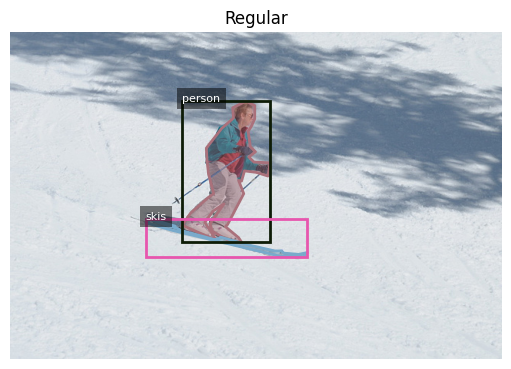

In [179]:
# Example usage for plotting multiple images horizontally
img_id = coco.getImgIds()[random.randint(0, 5000)]  # Replace with your desired image ID
print(f'img_id={img_id}')

img_path=coco.loadImgs(img_id)[0]['coco_url']
annotations = coco.loadAnns(coco.getAnnIds(imgIds=img_id))
I = io.imread(img_path)
I_plot = I.copy()

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
anns = BB_criterion(annotations, coco)#, standard_method='regular', floating_objects=[],
                    #Standing_objects=[], objects_with_axis=[])
show_obbox(I_plot, anns, coco, title='Regular', with_segment=True, with_arrow=False,with_category=True, ax=ax)

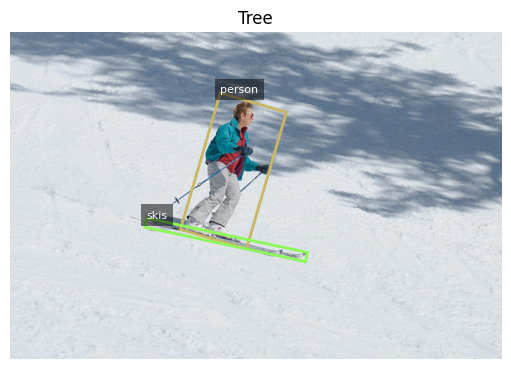

In [180]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
anns = BB_criterion(annotations, coco, standard_method= 'rotating_calipers',
                    floating_objects=MethodsLists['rotating_calipers'],
                    Standing_objects=MethodsLists['regular'], objects_with_axis=MethodsLists['PCA'])
show_obbox(I_plot, anns, coco, title='Tree', with_segment=False, with_arrow=False,with_category=True, ax=ax)